In [11]:
!pip install pandas
!pip install folium
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium


In [12]:
!pip install plotly
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os

In [13]:
pwd

'/home/prachi/Downloads'

In [60]:
data = pd.read_csv("./corona.csv",engine="python")

In [61]:
data.columns

Index(['Unnamed: 0', 'user', 'location', 'tweet'], dtype='object')

/home/prachi/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



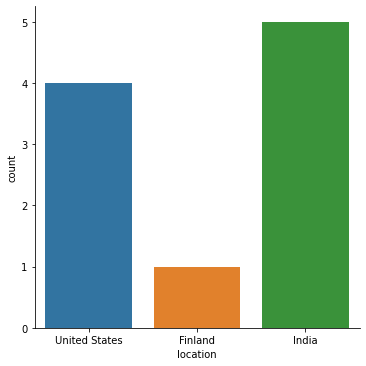

In [47]:
sns.catplot("location", data=data, kind="count")
plt.show()

In [22]:
!pip install pycountry-convert

     |████████████████████████████████| 280 kB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 10.1 MB 2.6 MB/s eta 0:00:01    |████████████████████████████▋   | 9.1 MB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 245 kB 2.0 MB/s eta 0:00:01
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=ce3d373478621aa4b722a02892c328e856fe49b139371c846d9e342271e79d20
  Stored in directory: /home/prachi/.cache/pip/wheels/09/eb/0d/4ee773c6a4aadc2a43cb5c1d07f268f13c4cdc0eec88e7c1ef
Successfully built pycountry
  Attempting uninstall: pytest
    Found existing installation: pytest 0.0.0
    Uninstalling pytest-0.0.0:
      Successfully uninstalled pytest-0.0.0


In [48]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

In [89]:
def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
        print(col)
    except:
        cn_a2_code = 'Unknown'
        
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_a2_code, cn_continent)

In [39]:
col = ['India' , 'Finland' , 'Deutschland','Visakhapatnam']

In [40]:
data['location']

0                 india
1           Deutschland
2                 india
3               Finland
4                 India
5    Im Herzen der Welt
6         Visakhapatnam
7               Finland
8                    us
9                 India
Name: location, dtype: object

In [98]:
i=0
for country in data.location:
    codes = get_continent(country)
    print(codes[0] , codes[1])
    data.loc[i,['country']] = codes[0]
    data.loc[i,['continent']] = codes[1]
    i = i+1
    

United States
US NA
United States
US NA
United States
US NA
Finland
FI EU
India
IN AS
India
IN AS
India
IN AS
India
IN AS
United States
US NA
India
IN AS


In [101]:
data

,Unnamed: 0,user,location,tweet,country,continent
0,NaN,salah48850404,United States,RT @SiddShahab: Government should understand t...,US,NA
1,NaN,Schneem31086852,United States,RT @Dwalingen: Breaking!\n\nBelgian TV show wi...,US,NA
2,NaN,_Covid19_World_,United States,Coronavirus Covid-19 World Daily Report\n2/10...,US,NA
3,NaN,Hans_C_G,Finland,RT @Dwalingen: Breaking!\n\nBelgian TV show wi...,FI,EU
4,NaN,BloodDonorWorld,India,RT @Bloodpointorg: #Pune #SOS #COVID19India\nN...,IN,AS
5,NaN,Uehmche,India,#Corona #Allaf Wieverfastelovend-Office https:...,IN,AS
6,NaN,uskyeducation,India,Double Masks Offer Significantly Better Protec...,IN,AS
7,NaN,jjanhone,India,The reason for the change is of course the #co...,IN,AS
8,NaN,LaGabyGa_Arts,United States,RT @swisstoons: Coronavirus T-Shirt for folks ...,US,NA
9,NaN,salah48850404,India,RT @EDriSs74: Government should understand the...,IN,AS


In [100]:
data.drop('continenet', inplace=True, axis=1)

In [65]:
!pip install geopy


     |████████████████████████████████| 112 kB 1.3 MB/s eta 0:00:01


In [102]:
from geopy.geocoders import Nominatim

In [104]:
geolocator = Nominatim(user_agent='myapp')


In [73]:
print(location.address)

Flatiron Building, 175, 5th Avenue, Flatiron District, Manhattan Community Board 5, Manhattan, New York County, New York, 10010, United States


In [74]:
print((location.latitude, location.longitude))

(40.741059199999995, -73.98964162240998)


In [105]:
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [116]:
for country in vals:
    print(geolocate(country))
    

(39.7837304, -100.4458825)
(39.7837304, -100.4458825)
(39.7837304, -100.4458825)
(63.2467777, 25.9209164)
(22.3511148, 78.6677428)
(22.3511148, 78.6677428)
(22.3511148, 78.6677428)
(22.3511148, 78.6677428)
(39.7837304, -100.4458825)
(22.3511148, 78.6677428)


In [110]:
geolocate('India')

(22.3511148, 78.6677428)

In [115]:
vals = data['country'].replace('IN','India')


,Unnamed: 0,user,location,tweet,country,continent
0,NaN,salah48850404,United States,RT @SiddShahab: Government should understand t...,US,NA
1,NaN,Schneem31086852,United States,RT @Dwalingen: Breaking!\n\nBelgian TV show wi...,US,NA
2,NaN,_Covid19_World_,United States,Coronavirus Covid-19 World Daily Report\n2/10...,US,NA
3,NaN,Hans_C_G,Finland,RT @Dwalingen: Breaking!\n\nBelgian TV show wi...,FI,EU
4,NaN,BloodDonorWorld,India,RT @Bloodpointorg: #Pune #SOS #COVID19India\nN...,IN,AS
5,NaN,Uehmche,India,#Corona #Allaf Wieverfastelovend-Office https:...,IN,AS
6,NaN,uskyeducation,India,Double Masks Offer Significantly Better Protec...,IN,AS
7,NaN,jjanhone,India,The reason for the change is of course the #co...,IN,AS
8,NaN,LaGabyGa_Arts,United States,RT @swisstoons: Coronavirus T-Shirt for folks ...,US,NA
9,NaN,salah48850404,India,RT @EDriSs74: Government should understand the...,IN,AS


In [117]:
i=0
for country in vals:
    codes = geolocate(country)
    print(codes[0] , codes[1])
    data.loc[i,['latitude']] = codes[0]
    data.loc[i,['longitude']] = codes[1]
    i = i+1
    

39.7837304 -100.4458825
39.7837304 -100.4458825
39.7837304 -100.4458825
63.2467777 25.9209164
22.3511148 78.6677428
22.3511148 78.6677428
22.3511148 78.6677428
22.3511148 78.6677428
39.7837304 -100.4458825
22.3511148 78.6677428


In [118]:
data

,Unnamed: 0,user,location,tweet,country,continent,latitude,longitude
0,NaN,salah48850404,United States,RT @SiddShahab: Government should understand t...,US,NA,39.783730,-100.445882
1,NaN,Schneem31086852,United States,RT @Dwalingen: Breaking!\n\nBelgian TV show wi...,US,NA,39.783730,-100.445882
2,NaN,_Covid19_World_,United States,Coronavirus Covid-19 World Daily Report\n2/10...,US,NA,39.783730,-100.445882
3,NaN,Hans_C_G,Finland,RT @Dwalingen: Breaking!\n\nBelgian TV show wi...,FI,EU,63.246778,25.920916
4,NaN,BloodDonorWorld,India,RT @Bloodpointorg: #Pune #SOS #COVID19India\nN...,IN,AS,22.351115,78.667743
5,NaN,Uehmche,India,#Corona #Allaf Wieverfastelovend-Office https:...,IN,AS,22.351115,78.667743
6,NaN,uskyeducation,India,Double Masks Offer Significantly Better Protec...,IN,AS,22.351115,78.667743
7,NaN,jjanhone,India,The reason for the change is of course the #co...,IN,AS,22.351115,78.667743
8,NaN,LaGabyGa_Arts,United States,RT @swisstoons: Coronavirus T-Shirt for folks ...,US,NA,39.783730,-100.445882
9,NaN,salah48850404,India,RT @EDriSs74: Government should understand the...,IN,AS,22.351115,78.667743


In [119]:
!pip install folium

In [120]:
import folium
from folium.plugins import MarkerCluster


In [164]:
world_map= folium.Map(tiles="cartodbpositron")

In [165]:
marker_cluster = MarkerCluster().add_to(world_map)

In [166]:
for i in range(len(data)):
        lat = data.iloc[i]['latitude']
        long = data.iloc[i]['longitude']
        popup_text = """Country : {}<br>
                    %of Users : {}<br>"""
        popup_text = popup_text.format(data.iloc[i]['country'],
                                   data.iloc[i]['user']
                                   )
        radius=5
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(world_map)

In [167]:
world_map

In [33]:
#create summarised data with country tweets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys, csv

cols = ['Country','Positive','Neutral','Negative']
data = pd.read_csv('Sentiment Analysis/march_countries.csv',header=None)
countries = data[0].unique()
countries
positives = 0
negatives = 0
neutrals = 0
with open('march_countries_count.csv', 'a', newline='') as csvfile:
    fieldnames = ['country','neutral','positive','negative']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    for i in range(len(countries)):
        positives = 0
        negatives = 0
        neutrals = 0
        for tweet in data.iterrows():
            try:
                if(tweet[1][0] == countries[i]):
                    
                    positives += tweet[1][1]
                    negatives += tweet[1][2]
                    neutrals += tweet[1][3]
                
            except:continue;
        writer.writerow({'country':countries[i], 'neutral':neutrals,'positive':positives,'negative':negatives})
        #print(tweet[1][0])

In [42]:
#data = country , Total +ve , Total -ve , total n

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as px
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
data = pd.read_csv('/home/prachi/Downloads/march_countries_count.csv',engine='python')
X = data.Country
cmap1 = ['red','green','orange']
plot = px.Figure(data = [px.Bar(name='Negative' , x = X,y = data.Negative,width=0.2 ), 
                         px.Bar(name='Positive' , x = X,y = data.Positive,width=0.2),
                        px.Bar(name='Neutral' , x = X,y = data.Neutral ,width=0.2)
                        ])
plot.update_layout(barmode='stack',colorway=cmap1)
plot.show()
plot.write_html("marchstack.html")

In [34]:
%pwd

'/home/prachi/Downloads'